## TEAM AWESOMESAUCE 
#### How has the COIVD-19 Pandemic affeted Domestic and International Flights from 2019 and 2020

#### The data obtained was from 1 January 2019 through 31 July 2020. As we get more data we will update the statistics

#### Team Hypothesis: COVID-19 drastically effect all flights but had a bigger impact Internationally as rest of the world took the disease more serious than the United States

## Observation and Insights
#### 1. Covid-19 effected the world and in our project, flights (foregin and domestic), in a major way. The overall data showed that all flights were effected but as you look closer you can possibly see how the rest of the world may have taken the disease a little more serious than the United States
#### 2. While there was a instant effect as the world went into lockdown, slowly but surely based on the data, it seems that things are getting back to normal. Internationally it seems that they are openining up the airways at a slower pace than the United States. 
#### 3. The Implementation of quarantining as you enter countries may also be a reason for the slow progression of more International Flights. Some states in the United States have tried to implement the rules but mostly countries outside of the United States still have these rules in place and so while all flights are gradually on the uptick, it will be a slower movement for International Flights to get back to or surpass numbers in the past. 

In [137]:
!pip install seaborn

     |████████████████████████████████| 285 kB 7.3 MB/s eta 0:00:01


In [159]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns

# Study data files
Airport_Data_2019 = "2019_T_T100_MARKET_ALL_CARRIER.csv"
Airport_Data_2020 = "2020_T_T100_MARKET_ALL_CARRIER.csv"

# Read CSV Files
Airport_Data_2019_df = pd.read_csv(Airport_Data_2019)
Airport_Data_2020_df = pd.read_csv(Airport_Data_2020)


In [160]:
# Display 2019 data 
Airport_Data_2019_df.count()

PASSENGERS             321168
CARRIER                321168
CARRIER_NAME           321168
ORIGIN                 321168
ORIGIN_CITY_NAME       321168
ORIGIN_STATE_ABR       293012
ORIGIN_COUNTRY         321168
ORIGIN_COUNTRY_NAME    321168
DEST                   321168
DEST_CITY_NAME         321168
DEST_STATE_ABR         292196
DEST_COUNTRY           321168
DEST_COUNTRY_NAME      321168
YEAR                   321168
QUARTER                321168
MONTH                  321168
DISTANCE_GROUP         321168
CLASS                  321168
DATA_SOURCE            321168
Unnamed: 19                 0
dtype: int64

In [161]:
# Display 2020 data
Airport_Data_2020_df.count()

PASSENGERS             139546
CARRIER                139546
CARRIER_NAME           139542
ORIGIN                 139546
ORIGIN_CITY_NAME       139546
ORIGIN_STATE_ABR       128557
ORIGIN_COUNTRY         139546
ORIGIN_COUNTRY_NAME    139546
DEST                   139546
DEST_CITY_NAME         139546
DEST_STATE_ABR         128200
DEST_COUNTRY           139546
DEST_COUNTRY_NAME      139546
YEAR                   139546
QUARTER                139546
MONTH                  139546
DISTANCE_GROUP         139546
CLASS                  139546
DATA_SOURCE            139546
Unnamed: 19                 0
dtype: int64

In [162]:
# Join 2019 and 2020 DataFrames in to one DataFrame
df_list = [Airport_Data_2019_df,Airport_Data_2020_df]
Flights_df = pd.concat(df_list)
Flights_df

,PASSENGERS,CARRIER,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 19
0,0.0,EM,Empire Airlines Inc.,ABQ,"Albuquerque, NM",NM,US,United States,DRO,"Durango, CO",CO,US,United States,2019,1,3,1,G,DU,NaN
1,0.0,EM,Empire Airlines Inc.,ABQ,"Albuquerque, NM",NM,US,United States,FMN,"Farmington, NM",NM,US,United States,2019,1,3,1,G,DU,NaN
2,0.0,EM,Empire Airlines Inc.,AFW,"Dallas/Fort Worth, TX",TX,US,United States,ICT,"Wichita, KS",KS,US,United States,2019,1,3,1,G,DU,NaN
3,0.0,EM,Empire Airlines Inc.,AFW,"Dallas/Fort Worth, TX",TX,US,United States,LBB,"Lubbock, TX",TX,US,United States,2019,1,3,1,G,DU,NaN
4,0.0,EM,Empire Airlines Inc.,AFW,"Dallas/Fort Worth, TX",TX,US,United States,MAF,"Midland/Odessa, TX",TX,US,United States,2019,1,3,1,G,DU,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139541,72962.0,HA,Hawaiian Airlines Inc.,HNL,"Honolulu, HI",HI,US,United States,OGG,"Kahului, HI",HI,US,United States,2020,1,1,1,F,DU,NaN
139542,84608.0,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA",GA,US,United States,MCO,"Orlando, FL",FL,US,United States,2020,1,2,1,F,DU,NaN
139543,85349.0,DL,Delta Air Lines Inc.,MCO,"Orlando, FL",FL,US,United States,ATL,"Atlanta, GA",GA,US,United States,2020,1,2,1,F,DU,NaN
139544,86715.0,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA",GA,US,United States,MCO,"Orlando, FL",FL,US,United States,2020,1,1,1,F,DU,NaN


In [163]:
# Create a column in the Flights DataFrame to join Year and Month 

Flights_df['DATE'] = [date(year, month, 1) for year, month in zip(Flights_df['YEAR'], Flights_df['MONTH'])]
Flights_df

,PASSENGERS,CARRIER,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,...,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 19,DATE
0,0.0,EM,Empire Airlines Inc.,ABQ,"Albuquerque, NM",NM,US,United States,DRO,"Durango, CO",...,US,United States,2019,1,3,1,G,DU,NaN,2019-03-01
1,0.0,EM,Empire Airlines Inc.,ABQ,"Albuquerque, NM",NM,US,United States,FMN,"Farmington, NM",...,US,United States,2019,1,3,1,G,DU,NaN,2019-03-01
2,0.0,EM,Empire Airlines Inc.,AFW,"Dallas/Fort Worth, TX",TX,US,United States,ICT,"Wichita, KS",...,US,United States,2019,1,3,1,G,DU,NaN,2019-03-01
3,0.0,EM,Empire Airlines Inc.,AFW,"Dallas/Fort Worth, TX",TX,US,United States,LBB,"Lubbock, TX",...,US,United States,2019,1,3,1,G,DU,NaN,2019-03-01
4,0.0,EM,Empire Airlines Inc.,AFW,"Dallas/Fort Worth, TX",TX,US,United States,MAF,"Midland/Odessa, TX",...,US,United States,2019,1,3,1,G,DU,NaN,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139541,72962.0,HA,Hawaiian Airlines Inc.,HNL,"Honolulu, HI",HI,US,United States,OGG,"Kahului, HI",...,US,United States,2020,1,1,1,F,DU,NaN,2020-01-01
139542,84608.0,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA",GA,US,United States,MCO,"Orlando, FL",...,US,United States,2020,1,2,1,F,DU,NaN,2020-02-01
139543,85349.0,DL,Delta Air Lines Inc.,MCO,"Orlando, FL",FL,US,United States,ATL,"Atlanta, GA",...,US,United States,2020,1,2,1,F,DU,NaN,2020-02-01
139544,86715.0,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA",GA,US,United States,MCO,"Orlando, FL",...,US,United States,2020,1,1,1,F,DU,NaN,2020-01-01


In [164]:
# To set the date column as the index, so it plots chronologically:

Flights_df["DATE"] = pd.to_datetime(Flights_df["DATE"])
Flights_df.set_index("DATE", inplace=True)
Flights_df

,PASSENGERS,CARRIER,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 19
DATE,,,,,,,,,,,,,,,,,,,,
2019-03-01,0.0,EM,Empire Airlines Inc.,ABQ,"Albuquerque, NM",NM,US,United States,DRO,"Durango, CO",CO,US,United States,2019,1,3,1,G,DU,NaN
2019-03-01,0.0,EM,Empire Airlines Inc.,ABQ,"Albuquerque, NM",NM,US,United States,FMN,"Farmington, NM",NM,US,United States,2019,1,3,1,G,DU,NaN
2019-03-01,0.0,EM,Empire Airlines Inc.,AFW,"Dallas/Fort Worth, TX",TX,US,United States,ICT,"Wichita, KS",KS,US,United States,2019,1,3,1,G,DU,NaN
2019-03-01,0.0,EM,Empire Airlines Inc.,AFW,"Dallas/Fort Worth, TX",TX,US,United States,LBB,"Lubbock, TX",TX,US,United States,2019,1,3,1,G,DU,NaN
2019-03-01,0.0,EM,Empire Airlines Inc.,AFW,"Dallas/Fort Worth, TX",TX,US,United States,MAF,"Midland/Odessa, TX",TX,US,United States,2019,1,3,1,G,DU,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,72962.0,HA,Hawaiian Airlines Inc.,HNL,"Honolulu, HI",HI,US,United States,OGG,"Kahului, HI",HI,US,United States,2020,1,1,1,F,DU,NaN
2020-02-01,84608.0,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA",GA,US,United States,MCO,"Orlando, FL",FL,US,United States,2020,1,2,1,F,DU,NaN
2020-02-01,85349.0,DL,Delta Air Lines Inc.,MCO,"Orlando, FL",FL,US,United States,ATL,"Atlanta, GA",GA,US,United States,2020,1,2,1,F,DU,NaN


In [165]:
# Create DataFrame to show all International Flights

int_df = Flights_df[Flights_df['DEST_COUNTRY']!=Flights_df['ORIGIN_COUNTRY']].copy()
int_df

,PASSENGERS,CARRIER,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 19
DATE,,,,,,,,,,,,,,,,,,,,
2019-03-01,0.0,GL,Miami Air International,AFW,"Dallas/Fort Worth, TX",TX,US,United States,SJD,"San Jose del Cabo, Mexico",NaN,MX,Mexico,2019,1,3,3,L,IU,NaN
2019-03-01,0.0,GL,Miami Air International,DAL,"Dallas, TX",TX,US,United States,GCM,"Grand Cayman, Cayman Islands",NaN,KY,Cayman Islands,2019,1,3,3,L,IU,NaN
2019-03-01,0.0,GL,Miami Air International,PIE,"St. Petersburg, FL",FL,US,United States,SJD,"San Jose del Cabo, Mexico",NaN,MX,Mexico,2019,1,3,4,L,IU,NaN
2019-03-01,0.0,GL,Miami Air International,PIT,"Pittsburgh, PA",PA,US,United States,YVR,"Vancouver, Canada",BC,CA,Canada,2019,1,3,5,L,IU,NaN
2019-03-01,0.0,GL,Miami Air International,SDQ,"Santo Domingo, Dominican Republic",NaN,DO,Dominican Republic,MEM,"Memphis, TN",TN,US,United States,2019,1,3,4,L,IU,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,34761.0,VS,Virgin Atlantic Airways,LHR,"London, United Kingdom",NaN,GB,United Kingdom,JFK,"New York, NY",NY,US,United States,2020,1,1,7,F,IF,NaN
2020-02-01,43513.0,BA,British Airways Plc,LHR,"London, United Kingdom",NaN,GB,United Kingdom,JFK,"New York, NY",NY,US,United States,2020,1,2,7,F,IF,NaN
2020-02-01,44180.0,BA,British Airways Plc,JFK,"New York, NY",NY,US,United States,LHR,"London, United Kingdom",NaN,GB,United Kingdom,2020,1,2,7,F,IF,NaN


In [166]:
# Create DataFrame to show all Domestic Flights

dom_df = Flights_df[Flights_df['DEST_COUNTRY']==Flights_df['ORIGIN_COUNTRY']].copy()
dom_df

,PASSENGERS,CARRIER,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,QUARTER,MONTH,DISTANCE_GROUP,CLASS,DATA_SOURCE,Unnamed: 19
DATE,,,,,,,,,,,,,,,,,,,,
2019-03-01,0.0,EM,Empire Airlines Inc.,ABQ,"Albuquerque, NM",NM,US,United States,DRO,"Durango, CO",CO,US,United States,2019,1,3,1,G,DU,NaN
2019-03-01,0.0,EM,Empire Airlines Inc.,ABQ,"Albuquerque, NM",NM,US,United States,FMN,"Farmington, NM",NM,US,United States,2019,1,3,1,G,DU,NaN
2019-03-01,0.0,EM,Empire Airlines Inc.,AFW,"Dallas/Fort Worth, TX",TX,US,United States,ICT,"Wichita, KS",KS,US,United States,2019,1,3,1,G,DU,NaN
2019-03-01,0.0,EM,Empire Airlines Inc.,AFW,"Dallas/Fort Worth, TX",TX,US,United States,LBB,"Lubbock, TX",TX,US,United States,2019,1,3,1,G,DU,NaN
2019-03-01,0.0,EM,Empire Airlines Inc.,AFW,"Dallas/Fort Worth, TX",TX,US,United States,MAF,"Midland/Odessa, TX",TX,US,United States,2019,1,3,1,G,DU,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,72962.0,HA,Hawaiian Airlines Inc.,HNL,"Honolulu, HI",HI,US,United States,OGG,"Kahului, HI",HI,US,United States,2020,1,1,1,F,DU,NaN
2020-02-01,84608.0,DL,Delta Air Lines Inc.,ATL,"Atlanta, GA",GA,US,United States,MCO,"Orlando, FL",FL,US,United States,2020,1,2,1,F,DU,NaN
2020-02-01,85349.0,DL,Delta Air Lines Inc.,MCO,"Orlando, FL",FL,US,United States,ATL,"Atlanta, GA",GA,US,United States,2020,1,2,1,F,DU,NaN


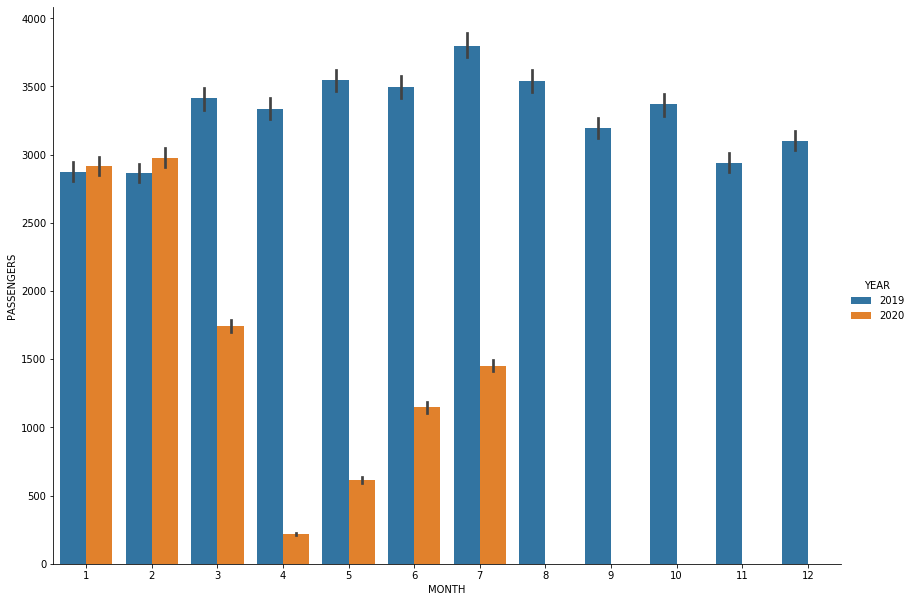

In [167]:
# Generate a bar graph showing the total number of Flights for 2019 and 2020 to show contrast

sns.catplot(x='MONTH', y='PASSENGERS', hue='YEAR', kind='bar', data=Flights_df, height=8.27, aspect=11.7/8.27);

## The above graph shows how Covid-19 has effected all flights (foreign and domestic) through July 31, 2020. As the world went on lockdown it shows how flights almost came to a complete stop and how as the world opens up the amount of flights is starting getting back to where it was prior to the pandemic. 

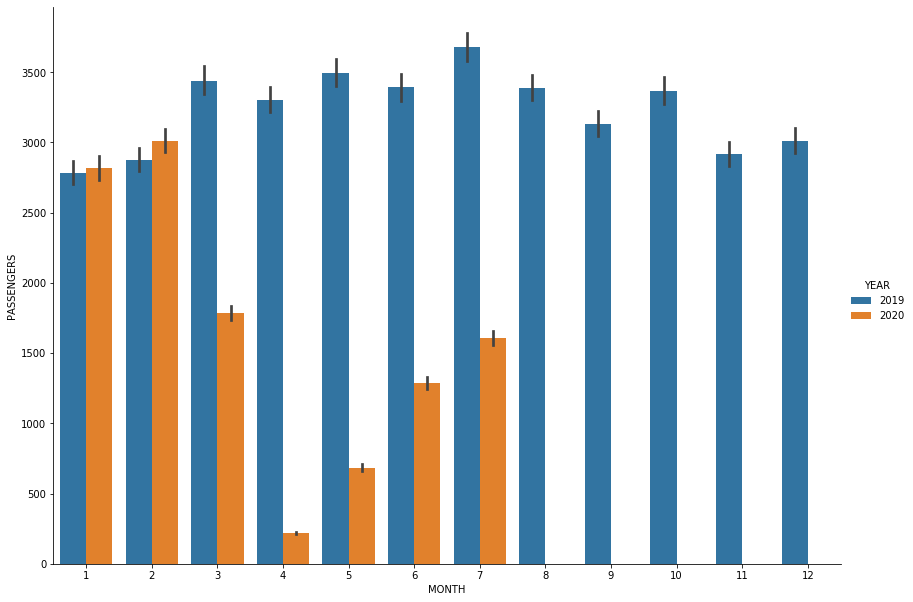

In [168]:
# Generate a bar graph showing the total number of Domestic Flights for 2019 and 2020 to show contrast

sns.catplot(x='MONTH', y='PASSENGERS', hue='YEAR', kind='bar', data=dom_df, height=8.27, aspect=11.7/8.27);

## The above graph shows the contrast of Domestic Flights from 2019 through July 31, 2020. Conisistent with the overall graph this graph shows that as the Lockdown happened in March 2020 flights almost came to a hault in the United States. As well as when the rules of the Lockdown eased the numbers started to creep back up and are slowly on their way increasing as the year progresses.

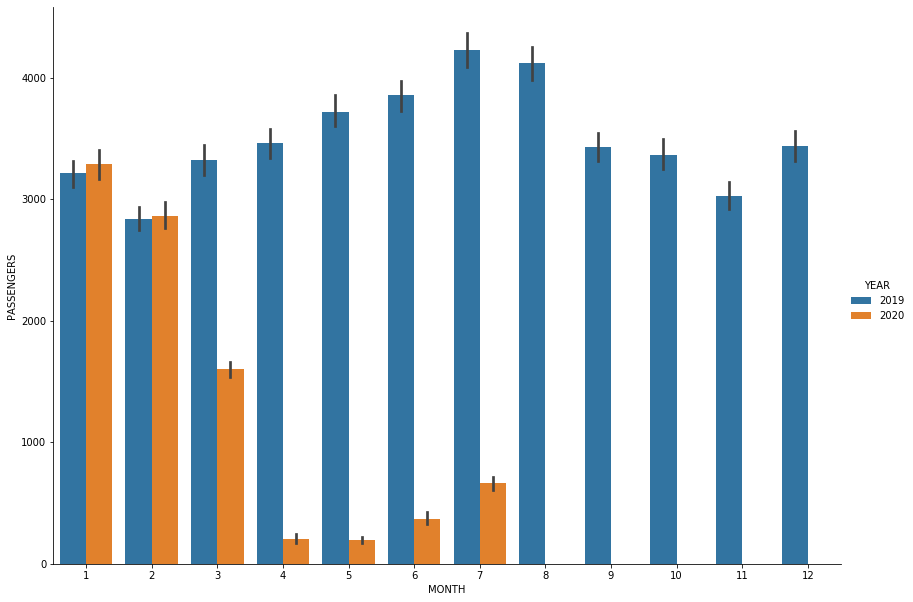

In [169]:
# Generate a bar plot showing the total number of International Flights for 2019 and 2020 to show contrast.

sns.catplot(x='MONTH', y='PASSENGERS', hue='YEAR', kind='bar', data=int_df, height=8.27, aspect=11.7/8.27);

## The graph above shows the contrast of International Flights from 2019 through July 31, 2020. It also shows how the pandemic has effected travel and to look deeper the reason that International Flights may be increasing at a slower rate is that other countries have harsher Lockdown rules and the implementation of quarantine rules once in a country may be the reason for this slow progression. 